# Naive Bayes 

In [186]:
import pandas as pd
import numpy as np

# Loading the csv dataset from excel
df = pd.read_csv("cancer_survival_data.csv")
df

,Class,Sex,Age,Region,Years_survived,Net_survival
0,malign,Male,15-44,HSE Dublin/Mid-Leinster,0.25,96.0
1,malign,Male,15-44,HSE Dublin/Mid-Leinster,0.50,93.6
2,malign,Male,15-44,HSE Dublin/Mid-Leinster,0.75,91.5
3,malign,Male,15-44,HSE Dublin/Mid-Leinster,1.00,89.4
4,malign,Male,15-44,HSE Dublin/Mid-Leinster,1.50,86.9
...,...,...,...,...,...,...
1493,benign,Male,85-99,HSE West,6.00,51.0
1494,benign,Male,85-99,HSE West,7.00,50.4
1495,benign,Male,85-99,HSE West,8.00,47.4
1496,benign,Male,85-99,HSE West,9.00,47.4


In [187]:
# Checking if there is any missing values in the dataset:

df.isnull().sum()

Class             0
Sex               0
Age               0
Region            0
Years_survived    0
Net_survival      0
dtype: int64

In [188]:
# A more detail infomation about the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           1498 non-null   object 
 1   Sex             1498 non-null   object 
 2   Age             1498 non-null   object 
 3   Region          1498 non-null   object 
 4   Years_survived  1498 non-null   float64
 5   Net_survival    1498 non-null   float64
dtypes: float64(2), object(4)
memory usage: 70.3+ KB


In [189]:
# Description of the dataset:

df.describe()

,Years_survived,Net_survival
count,1498.000000,1498.000000
mean,4.026035,77.544526
std,3.162857,19.581476
min,0.250000,2.500000
25%,1.000000,66.350000
50%,3.000000,82.150000
75%,7.000000,94.200000
max,10.000000,100.000000


In [190]:
# Displaying the shape of the dataset: this shows that there are 1498 rows and 6 columns in the dataset
df.shape

(1498, 6)

In [191]:
# Displaying the actual number of observations in each column
df.count()

Class             1498
Sex               1498
Age               1498
Region            1498
Years_survived    1498
Net_survival      1498
dtype: int64

In [192]:
# Here, I specify the output variable (also known as target or y variable)
target = df.Class

# Here, I seperate the output variable from the input variables
inputs = df.drop("Class", axis = "columns")

In [193]:
# Importing these python libraries for preprocessing of the dataset:

from sklearn.impute import SimpleImputer 
from sklearn import preprocessing

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To model the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [194]:
# Deep copying of dataset

df_rev = df.copy(deep=True)

In [195]:
# Label encoding of the variables or columns to be categorized

le = preprocessing.LabelEncoder()
Class_cat = le.fit_transform(df.Class)
Sex_cat = le.fit_transform(df.Sex)
Age_cat = le.fit_transform(df.Age)
Region_cat = le.fit_transform(df.Region)


In [196]:
# Initialize the encoded categorical columns

df_rev['Class_cat'] = Class_cat
df_rev['Sex_cat'] = Sex_cat
df_rev['Age_cat'] = Age_cat
df_rev['Region_cat'] = Region_cat

In [197]:
# Showing the combined dataset for both the initial dataset and its categorized copy)
df_rev.head(5)

,Class,Sex,Age,Region,Years_survived,Net_survival,Class_cat,Sex_cat,Age_cat,Region_cat
0,malign,Male,15-44,HSE Dublin/Mid-Leinster,0.25,96.0,1,1,0,0
1,malign,Male,15-44,HSE Dublin/Mid-Leinster,0.50,93.6,1,1,0,0
2,malign,Male,15-44,HSE Dublin/Mid-Leinster,0.75,91.5,1,1,0,0
3,malign,Male,15-44,HSE Dublin/Mid-Leinster,1.00,89.4,1,1,0,0
4,malign,Male,15-44,HSE Dublin/Mid-Leinster,1.50,86.9,1,1,0,0


In [198]:
# Dropping the initial or former categorical columns:

dummy_fields = ['Class', 'Sex', 'Age', 'Region']
df_rev = df_rev.drop(dummy_fields, axis = 1)

In [199]:
# Displaying the top 5 rows of the newly categorized dataset

df_rev.head(5)

,Years_survived,Net_survival,Class_cat,Sex_cat,Age_cat,Region_cat
0,0.25,96.0,1,1,0,0
1,0.50,93.6,1,1,0,0
2,0.75,91.5,1,1,0,0
3,1.00,89.4,1,1,0,0
4,1.50,86.9,1,1,0,0


In [200]:
# Displaying the bottom 5 rows of the newly categorized dataset

df_rev.tail(5)

,Years_survived,Net_survival,Class_cat,Sex_cat,Age_cat,Region_cat
1493,6.0,51.0,0,1,7,3
1494,7.0,50.4,0,1,7,3
1495,8.0,47.4,0,1,7,3
1496,9.0,47.4,0,1,7,3
1497,10.0,47.4,0,1,7,3


In [201]:
# Detail description of the new categorized variables

df_rev.describe()

,Years_survived,Net_survival,Class_cat,Sex_cat,Age_cat,Region_cat
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,4.026035,77.544526,0.599466,0.400534,3.196262,1.500668
std,3.162857,19.581476,0.490170,0.490170,2.039080,1.119004
min,0.250000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,66.350000,0.000000,0.000000,2.000000,0.250000
50%,3.000000,82.150000,1.000000,0.000000,3.000000,2.000000
75%,7.000000,94.200000,1.000000,1.000000,4.000000,2.750000
max,10.000000,100.000000,1.000000,1.000000,7.000000,3.000000


In [202]:
# More description of the categorized dataset

df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Years_survived  1498 non-null   float64
 1   Net_survival    1498 non-null   float64
 2   Class_cat       1498 non-null   int32  
 3   Sex_cat         1498 non-null   int32  
 4   Age_cat         1498 non-null   int32  
 5   Region_cat      1498 non-null   int32  
dtypes: float64(2), int32(4)
memory usage: 46.9 KB


In [203]:
# Display of the correlation among the variables. There is no good positive correlation among the variables.

df_rev.corr()

,Years_survived,Net_survival,Class_cat,Sex_cat,Age_cat,Region_cat
Years_survived,1.000000,-0.425525,-0.890244,0.001887,-0.003175,0.001033
Net_survival,-0.425525,1.000000,0.370316,0.099000,-0.529506,-0.016999
Class_cat,-0.890244,0.370316,1.000000,0.000891,-0.001499,-0.001948
Sex_cat,0.001887,0.099000,0.000891,1.000000,0.121800,-0.000488
Age_cat,-0.003175,-0.529506,-0.001499,0.121800,1.000000,0.000821
Region_cat,0.001033,-0.016999,-0.001948,-0.000488,0.000821,1.000000


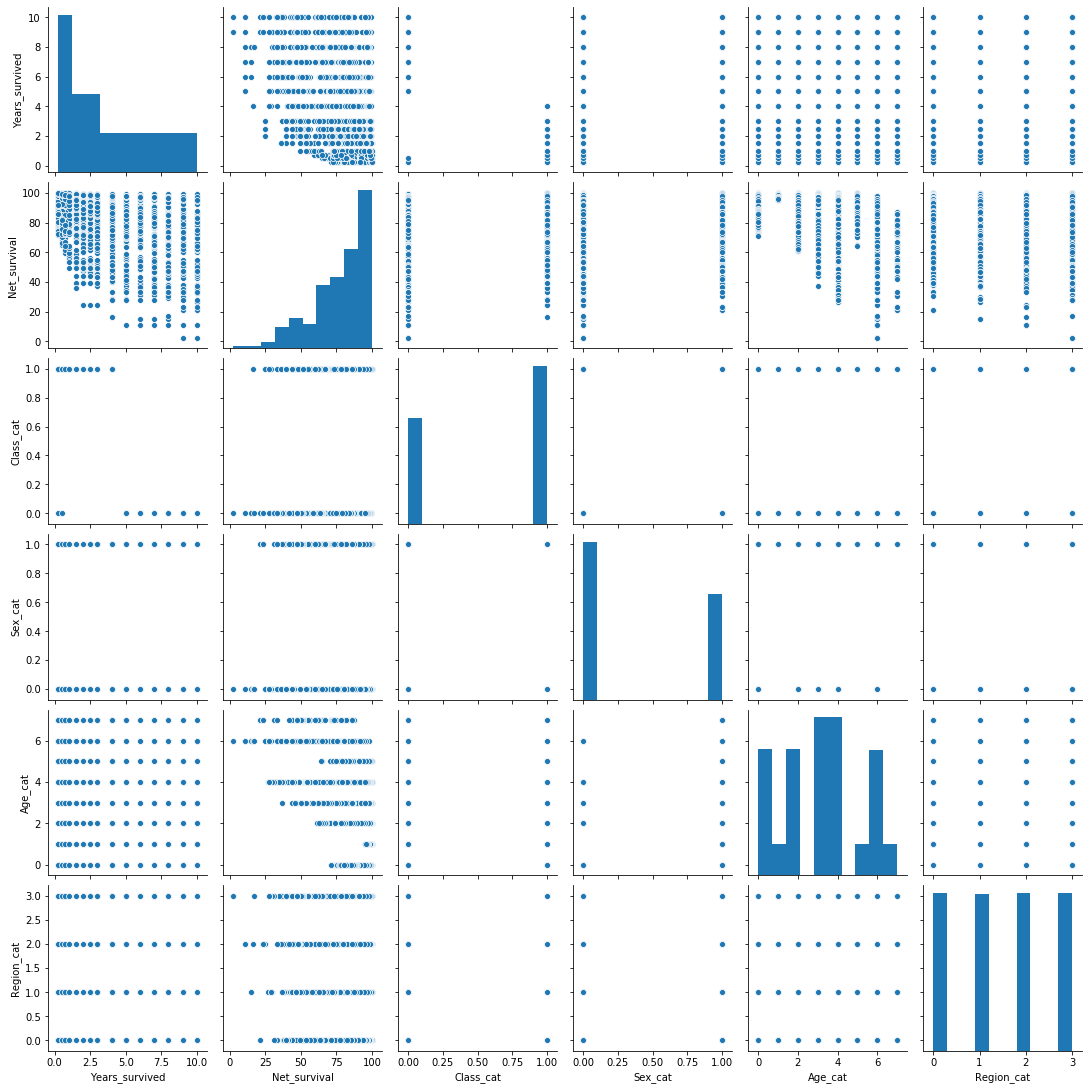

In [204]:
# Data visualization: plotting the data to visualize the relationship tha exist.in the dataset among variables.
# The plots show that the data are not distributed randomly.

%matplotlib inline
import seaborn as sns
sns.pairplot(df_rev)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7916B4AC8>,
      dtype=object)

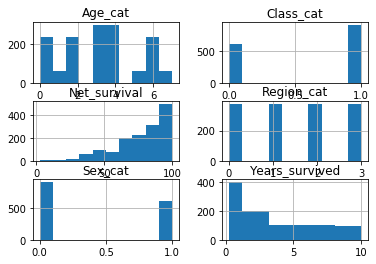

In [205]:
# Histogram visualizing the distribution of the dataset

df_rev.hist()

In [206]:
# Seperating the new categorized output variable "Class" from the categorized input variables:

target = df_rev.Class_cat

In [207]:
# Splitting the dataset into training 70% and testing 30% with random samples of 10

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_rev, target, test_size = 0.3, random_state = 10)

In [208]:
# Displaying the number of samples for training the model which represents 70% of the entire dataset

len(x_train)

1048

In [209]:
# Displaying the number of samples that will be use for testing the model which represents 30% of the entire dataset

len(x_test)

450

In [210]:
# Implementing the Gaussian Gaive Bayes model

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [211]:
#Fitting the Gaussian Naive Bayes Model on the training dataset

model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [212]:
# The model accuracy showing that the NB is 100% accurate for classification using this dataset

model.score(x_test, y_test)

1.0

In [213]:
# first 200 randomly selected input samples tested

x_test[:200]

,Years_survived,Net_survival,Class_cat,Sex_cat,Age_cat,Region_cat
633,1.00,98.3,1,0,0,2
56,7.00,81.9,0,1,0,3
1244,0.50,99.5,1,1,1,3
1305,0.75,99.9,1,1,3,3
1030,6.00,64.8,0,0,3,0
...,...,...,...,...,...,...
1014,5.00,79.8,0,0,2,3
613,9.00,82.6,0,0,0,0
647,0.75,98.6,1,0,0,3
738,1.00,98.5,1,0,3,1


In [214]:
# First 10 classified random samples using the testing samples(0 represents malign tumor or severe case and 
# 1 represents benign tumor or not severe)

y_test[:10]

633     1
56      0
1244    1
1305    1
1030    0
267     0
1248    1
1350    1
87      0
1238    0
Name: Class_cat, dtype: int32

In [215]:
# First 10 probability of random samples classified (0 represents malign tumor and 1 represents benign tumor)

model.predict_proba(x_test[:10])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

# K-Nearest Neighbor (KNN) Classifier

In [216]:
# Importing python libraries for KNN classifier

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [217]:
# Categorized dataset

df_rev.head()

,Years_survived,Net_survival,Class_cat,Sex_cat,Age_cat,Region_cat
0,0.25,96.0,1,1,0,0
1,0.50,93.6,1,1,0,0
2,0.75,91.5,1,1,0,0
3,1.00,89.4,1,1,0,0
4,1.50,86.9,1,1,0,0


In [218]:
# Data description 

df_rev.describe()

,Years_survived,Net_survival,Class_cat,Sex_cat,Age_cat,Region_cat
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,4.026035,77.544526,0.599466,0.400534,3.196262,1.500668
std,3.162857,19.581476,0.490170,0.490170,2.039080,1.119004
min,0.250000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,66.350000,0.000000,0.000000,2.000000,0.250000
50%,3.000000,82.150000,1.000000,0.000000,3.000000,2.000000
75%,7.000000,94.200000,1.000000,1.000000,4.000000,2.750000
max,10.000000,100.000000,1.000000,1.000000,7.000000,3.000000


In [219]:
# Droping off target or output variable also known as Class_cat to seperate it from the inputs variables

target = df_rev.Class_cat
x = df_rev.drop("Class_cat", axis = "columns")

In [220]:
# Displaying the first 3 rows of the categorized input variables:

x.head(3)

,Years_survived,Net_survival,Sex_cat,Age_cat,Region_cat
0,0.25,96.0,1,0,0
1,0.50,93.6,1,0,0
2,0.75,91.5,1,0,0


In [221]:
# Renaming the 'target' variable to represent y:

y = target
y.head(3)

0    1
1    1
2    1
Name: Class_cat, dtype: int32

In [222]:
# Paramter tuning: choosing the value of K by finding the square root of the total number of observations (i.e 1498) and
# subtracting 1 from it to avoid even k value:

import math
math.sqrt(len(y))-1

37.704004960727254

In [223]:
# Splitting the dataset into training 70% and testing 30% with random samples of 10

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [224]:
# Implementing the KNN Model: value of n_neighbors = 37 is the value of K, p = 2 represents the two classes of the
# output variables (malign and benign) and euclidean metric is the system of measurement used for measuring distance.

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=37, p=2, metric='euclidean')
classifier.fit(x_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

In [225]:
# Predicting the test set values:

y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [226]:
# Model Evaluation using confusion matrix:

cm = confusion_matrix(y_test, y_pred)
cm

array([[144,  22],
       [ 12, 272]], dtype=int64)

In [227]:
# The confusion matrix tells us that 144 and 272 predicted observations are correct classifications while 22 and 12 are
# the wrong or misclassified outcomes representing false negative and false positives values.

In [228]:
# The f1 score also suggests the precision of the model taking into account the balance of false positives.

print(f1_score(y_test, y_pred))

0.9411764705882353


In [229]:
# Determining the accuracy score of the fitted model. In this study, the KNN model is approximately 92% accurate

print(accuracy_score(y_test, y_pred))

0.9244444444444444


# Support Vector Machines (SVM)

In [230]:
# Importing libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [231]:
# Categorized dataset

df_rev.head()

,Years_survived,Net_survival,Class_cat,Sex_cat,Age_cat,Region_cat
0,0.25,96.0,1,1,0,0
1,0.50,93.6,1,1,0,0
2,0.75,91.5,1,1,0,0
3,1.00,89.4,1,1,0,0
4,1.50,86.9,1,1,0,0


In [232]:
# Droping off target or output variable also known as Class_cat to seperate it from the inputs variables

target = df_rev.Class_cat
x = df_rev.drop("Class_cat", axis = "columns")

In [233]:
# Renaming the 'target' variable to represent y:

y = target
y.head(3)

0    1
1    1
2    1
Name: Class_cat, dtype: int32

In [234]:
# Splitting the dataset into training 70% and testing 30% and with random samples of 10

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [235]:
# Importing Support Vector Classifier (SVC) for implementing the SVM model

from sklearn.svm import SVC
model = SVC()

In [236]:
# Fitting the SVM model with low regularization parameter C=1.0

model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [237]:
# Determining the accuracy of the model. This suggests that the model is about 96% accurate in classification using this dataset

model.score(x_test, y_test)

0.9577777777777777

In [238]:
# To Classify the output variables
# The higher the value of C, the higher the model precision for both classes. At C = 6.0, both the precision score and
# the f1 score were 1.0 (perfect fit) for this test dataset.

from sklearn import svm

classifier = svm.SVC(kernel='rbf', gamma='scale', C=1.0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [239]:
# Making prediction using the fitted SVC model

y_predict = classifier.predict(x_test)
y_predict

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [240]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       166
           1       0.96      0.98      0.97       284

    accuracy                           0.96       450
   macro avg       0.96      0.95      0.95       450
weighted avg       0.96      0.96      0.96       450



# Decision Tree (DT)

In [241]:
# Importing libraries

import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score

In [242]:
# Categorized dataset

df_rev.head()

,Years_survived,Net_survival,Class_cat,Sex_cat,Age_cat,Region_cat
0,0.25,96.0,1,1,0,0
1,0.50,93.6,1,1,0,0
2,0.75,91.5,1,1,0,0
3,1.00,89.4,1,1,0,0
4,1.50,86.9,1,1,0,0


In [243]:
# Droping off target or output variable also known as Class_cat to seperate it from the inputs variables

target = df_rev.Class_cat
x = df_rev.drop("Class_cat", axis = "columns")

In [244]:
# Renaming the 'target' variable to represent y:

y = target
y.head(3)

0    1
1    1
2    1
Name: Class_cat, dtype: int32

In [245]:
# Displaying the input variables

x.head(3)

,Years_survived,Net_survival,Sex_cat,Age_cat,Region_cat
0,0.25,96.0,1,0,0
1,0.50,93.6,1,0,0
2,0.75,91.5,1,0,0


In [246]:
# Splitting the dataset into training 70% and testing 30% with random samples of 10

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [247]:
# Importing the decision tree classifier from sklearn

from sklearn import tree

tree_model = tree.DecisionTreeClassifier()

In [248]:
# Fitting the DT model

tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [249]:
# Checking the accuracy of the implemented Decision Tree model. This states that the DT model is 100% accurate in
# the classification of malign and benign tumors using this dataset.

tree_model.score(x_train, y_train)

1.0

In [251]:
# Clasifications made using the testing dataset

y_predict = model.predict(x_test)
y_predict

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,